# Identificação no dominio da frequência
### *
Temos o circuito:
$$V_0(S)=V_I(S)\frac{LS/\frac{1}{SC}}{R+LS/\frac{1}{SC}}$$
Equivalente a:
$$G(S)=\frac{V_0(S)}{V_I(S)}=\frac{LS}{R+LS+S^2RLC}$$
Para obter a resposta em frequência, fazermo $S=j\omega$:
$$G(j\omega)=\frac{V_0(j\omega)}{V_I(j\omega)}=\frac{L(j\omega)}{R+L(j\omega)+(j\omega)^2RLC}$$
Variando a frequência $\omega$, obtemos a resposta em frequência $G(j\omega) \in \Complex$
### Exemplo:
Obter a resposta do sistema para um conjunto de frequências $\omega k, k = 1,2,3,...,1000$. Distribua logaritimamente os 1000 pontos de frequência $\omega k$ no intervalo [0.01,10] rad/s. Considere:
$$R=1\Omega \\
L=2H \\
C=3F
$$

Sendo:
$$G(S)=\frac{2S}{1+2S+6S^2}=\frac{b_0+b_1S}{1+a_1S+a_2S^2}$$
Com $b_0=0,b_1=2,a_1=2,a_2=6$

### Pergunta
Supondo que eu medi a resposta em frequência $G(j\omega k)$ de um sistema para N frequências diferentes $\omega k, k = 1,2,3,...,N$. Eu consigo estimar a função de transferência?
$$(\omega k, G(S_k)),k=1,2,3,...,N \rightarrow \frac{b_0+b_1S}{1+a_1S+a_2S^2}$$


In [13]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [43]:
b0 = 0
b1 = 2
a0 = 1
a1 = 2
a2 = 6
N = 1000
w = np.logspace(start=-2,stop=1,num=N)
S = 1j*w
G_s = (b0+b1*S)/(a0+a1*S+a2*(S**2))

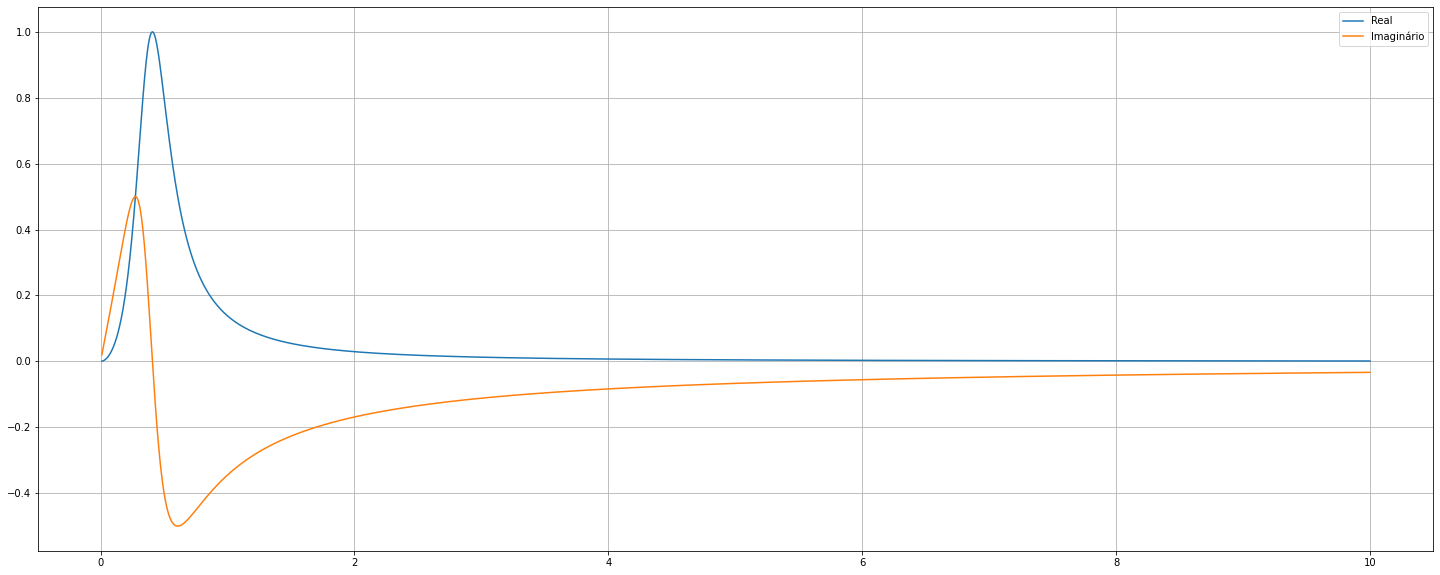

In [44]:
plt.figure(figsize=(25,10))
sns.lineplot(x=w,y=G_s.real,label='Real')
sns.lineplot(x=w,y=G_s.imag,label='Imaginário')
plt.grid()
plt.show()
plt.close()


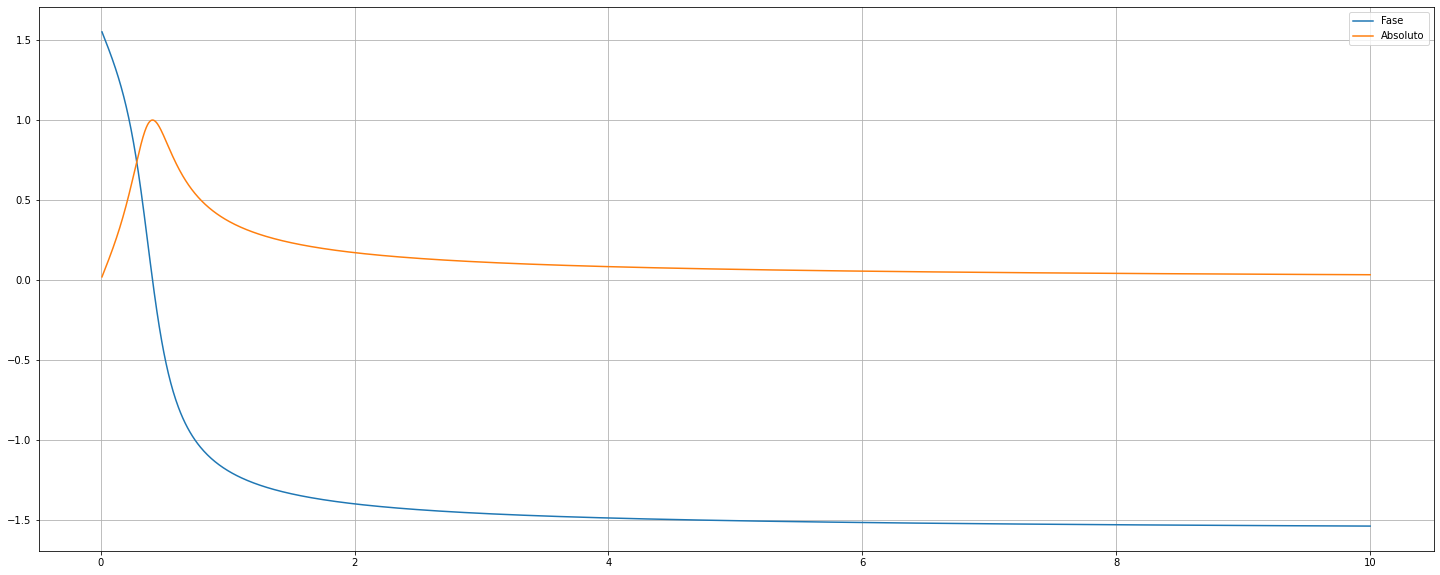

In [45]:
plt.figure(figsize=(25,10))
sns.lineplot(x=w,y=np.angle(G_s),label='Fase')
sns.lineplot(x=w,y=np.abs(G_s),label='Absoluto')
plt.grid()
plt.show()
plt.close()


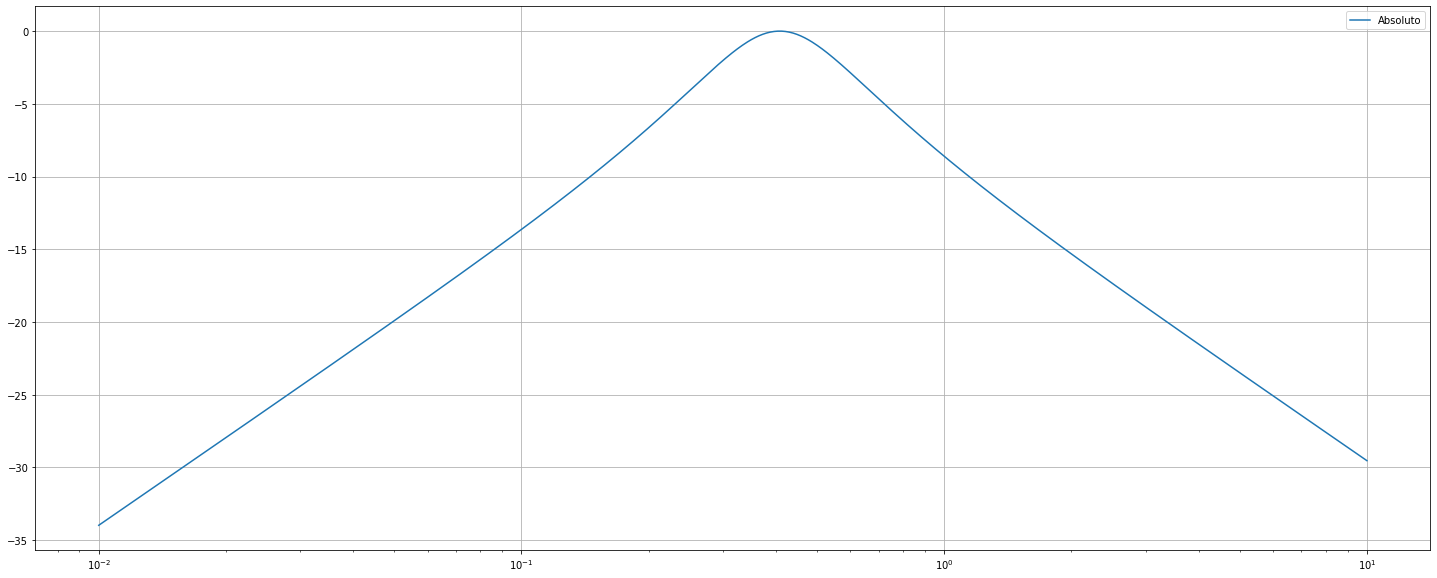

In [46]:
plt.figure(figsize=(25,10))
G_s_ganho = 20*np.log10(np.abs(G_s))
p1 = sns.lineplot(x=w,y=G_s_ganho,label='Absoluto')
p1.set(xscale="log")
plt.grid()
plt.show()
plt.close()

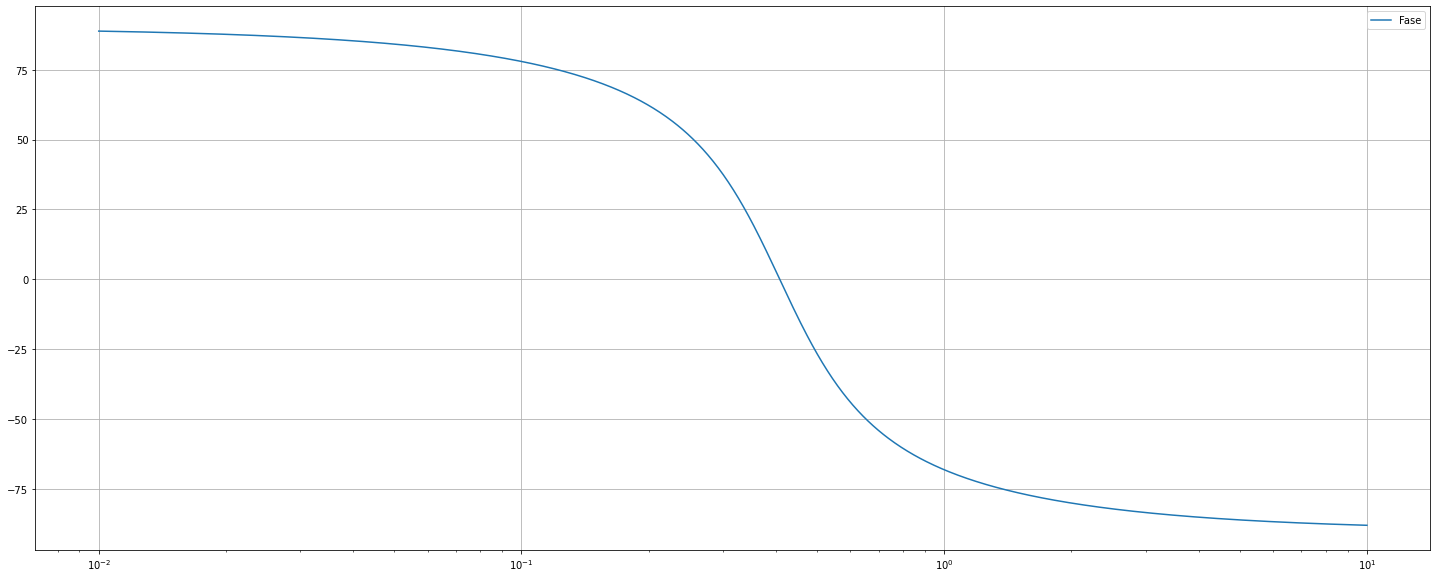

In [47]:
plt.figure(figsize=(25,10))
G_s_fase = ''
p1 = sns.lineplot(x=w,y=np.angle(G_s)*180/np.pi,label='Fase')
p1.set(xscale="log")
plt.grid()
plt.show()
plt.close()

### Método de Levy (Solve et Coagula)
O método presume um modelo na forma:
$$\hat{G}(S)=\frac{b_0+b_1S+b_2S^2+...+b_{nb}S^{nb}}{a_0+a_1S+a_2S^2+...+a_{na}S^{na}}$$
Para o caso simples $na=2$ e $nb=1$:
$$\hat{G}(S)=\frac{b_0+b_1S}{a_0+a_1S+a_2S^2}$$
Em termos de resposta em frequência:
$$\hat{G}(j\omega k)=\frac{b_0+b_1(j\omega k)}{a_0+a_1(j\omega k)+a_2(j\omega k)^2}$$


### Ideia
Encontrar os valores de $\Theta=\begin{bmatrix} b_0 & b_1 & a_1 & a_2 \end{bmatrix}$ que minizam:
$$J(\theta)=\frac{1}{N}\sum\limits_{k=1}^{N}\left| G(j\omega k)-\hat{G}(j\omega k)\right|^2$$
Se torna uma função não linear em seus parametros:
$$J(\theta)=\frac{1}{N}\sum\limits_{k=1}^{N}\left| G(j\omega k)-\frac{b_0+b_1(j\omega k)}{a_0+a_1(j\omega k)+a_2(j\omega k)^2}\right|^2$$

### Função alternativa
Como ela não é linear em $\Theta$, usaremos uma função alternativa:
$$\tilde{J}(\theta)=\frac{1}{N}\sum\limits_{k=1}^{N}\left| (a_0+a_1(j\omega k)+a_2(j\omega k)^2)G(j\omega k)-b_0+b_1(j\omega k)\right|^2$$
Sendo $S_k=j\omega k$:
$$\hat{y}=M\theta=\begin{bmatrix} 1 & S_k & -S_kG(S_k) & \cdots & -S_k^2G(S_k)\end{bmatrix} \cdot \begin{bmatrix}b_0 & b_1 & a_1 & a_2 \end{bmatrix}^T$$
Para calcular os valores, fazemos:
$$\tilde{M}=\begin{bmatrix} \Re(M) \\ \Im(M)\end{bmatrix}$$
$$\tilde{y}=\begin{bmatrix} \Re(y) \\ \Im(y)\end{bmatrix}$$
Aonde:
$$\theta^*=(\tilde{M}^T\tilde{M})^{-1}\tilde{M}^T\tilde{y}$$

### Atividade da aula
Use o conjunto de dados 'resp_em_freq_circuito_rlc.mat' e calcule os coeficientes $b_0,b_1,a_1,a_2$ ($A(S_k) e B(S_k)$) e compare os resultados com os dados originais.